<h1><b>Importing Required Modules

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
# import visualkeras as visual
# from collections import defaultdict
import tensorflow as tf
from tensorflow.keras import layers, losses, models
# from keras.utils import plot_model
import os
from tensorflow.keras.callbacks import TensorBoard
import numpy

<h1><b>Loading Data

In [ ]:
# Loading the data: MNIST Handwritten Digits

(X_train, _), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train, X_val = X_train[:-10000], X_train[:-10000]

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0

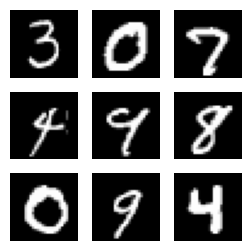

In [ ]:
plt.figure(figsize=(3, 3))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i+50].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


<h1><b>Defining Encoder and Decoder Architectures

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose


IMAGE_SIZE = 784  # 28x28 images
INPUT_SHAPE = (28, 28, 1)
shape = X_test.shape[1:]

def make_encoder():
    encoder = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=INPUT_SHAPE),
        layers.MaxPooling2D((2, 2), padding='same'),

        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),

        layers.Flatten(),
        layers.Dense(16, activation='relu')
    ])
    return encoder

def make_decoder():
    decoder = models.Sequential([
        layers.Dense(7*7*8, activation='relu'),
        layers.Reshape((7, 7, 8)),

        layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),

        layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),

        layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')
    ])
    return decoder

In [ ]:
print(shape)

(28, 28)


In [ ]:
encoder = make_encoder()
decoder = make_decoder()

In [ ]:
autoencoder = models.Sequential([encoder,
                                 decoder])

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss=losses.MeanSquaredError())

<h1><b>Training Autoencoder

In [ ]:
# !pip install tensorboard

In [ ]:
# %load_ext tensorboard

In [ ]:
# import os
# logdir = "/content/logs/"

In [ ]:
# tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
history = autoencoder.fit(X_train, X_train,
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
1563/1563 [==============================] - 48s 30ms/step - loss: 0.0330 - val_loss: 0.0190
Epoch 2/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0180 - val_loss: 0.0163
Epoch 3/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0162 - val_loss: 0.0152
Epoch 4/20
1563/1563 [==============================] - 46s 30ms/step - loss: 0.0152 - val_loss: 0.0144
Epoch 5/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0145 - val_loss: 0.0139
Epoch 6/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0140 - val_loss: 0.0134
Epoch 7/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0137 - val_loss: 0.0131
Epoch 8/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 9/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.0132 - val_loss: 0.0127
Epoch 10/20
1563/1563 [==============================] - 56s 36m

<h1><b>Visualising Results

In [ ]:
# %tensorboard --logdir logs

In [ ]:
encoded_imgs = encoder(X_test).numpy()


decoded_imgs = decoder(encoded_imgs).numpy()

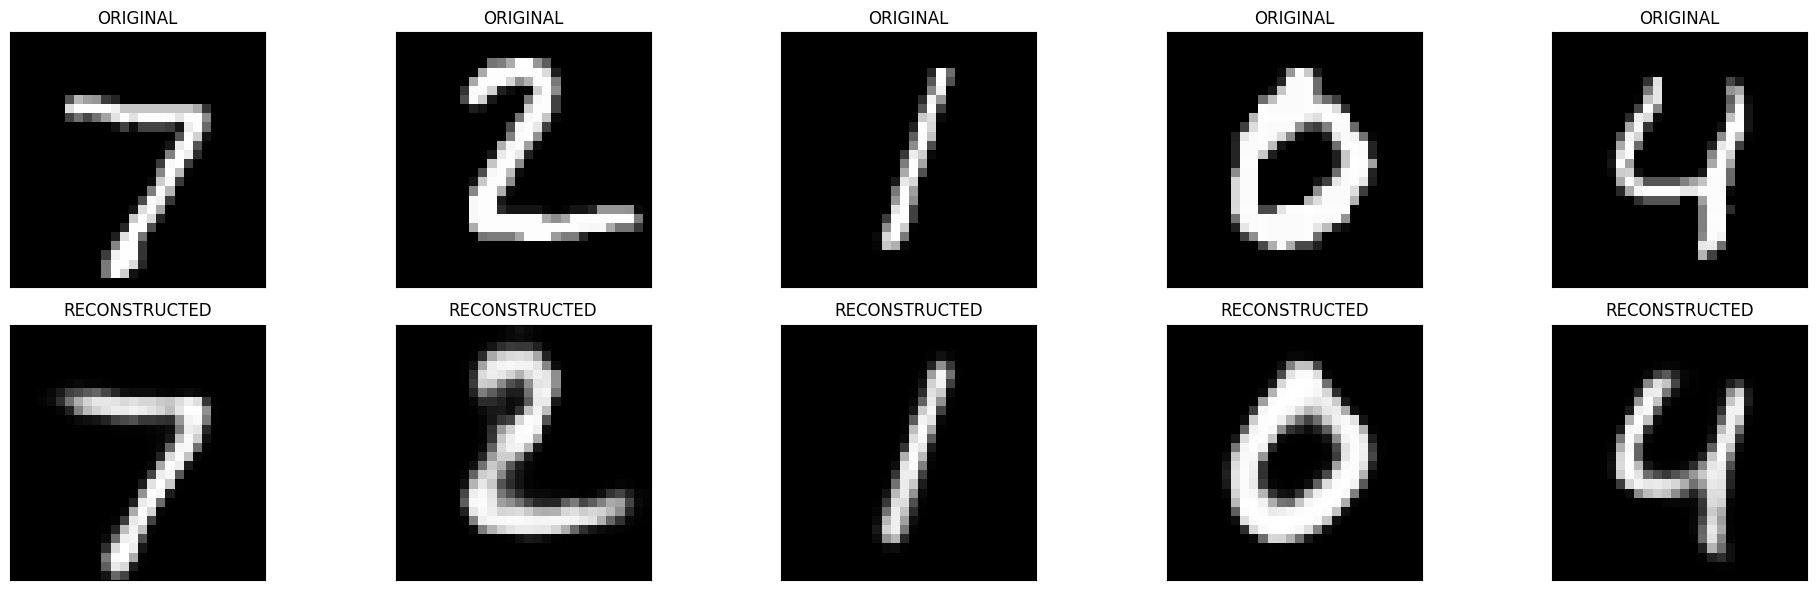

In [ ]:
n = 5
plt.figure(figsize=(20, 6))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("ORIGINAL")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("RECONSTRUCTED")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

<h1><b>Testing

In [ ]:
img = X_test[90]

In [ ]:
img = img.reshape(1, 28, 28)

In [ ]:
encoded_imgs = encoder(img).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()


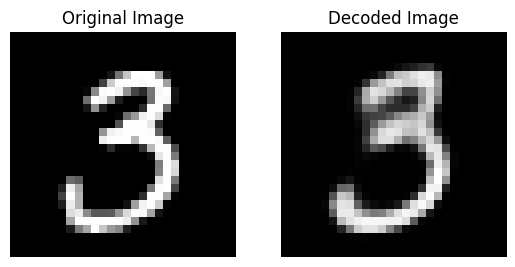

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(img[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[0], cmap='gray')
plt.title('Decoded Image')
plt.axis('off')

plt.show()


313/313 [==============================] - 2s 5ms/step


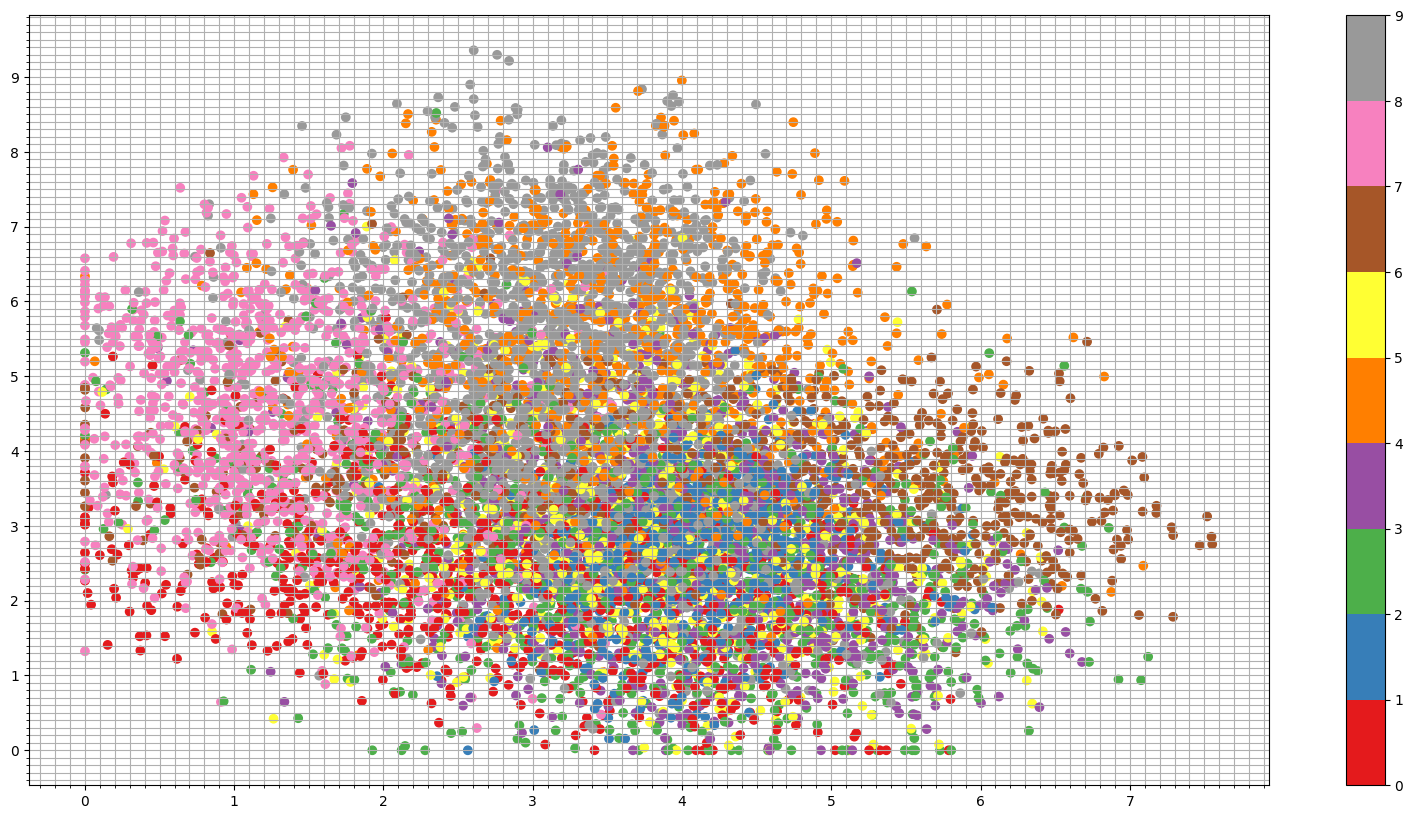

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

X_pred = encoder.predict(X_test)

plt.figure(figsize=(20, 10))
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_test, cmap='Set1')
plt.colorbar()

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1.0))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Set the major and minor ticks for y-axis
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1.0))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.grid(which='both')

plt.show()

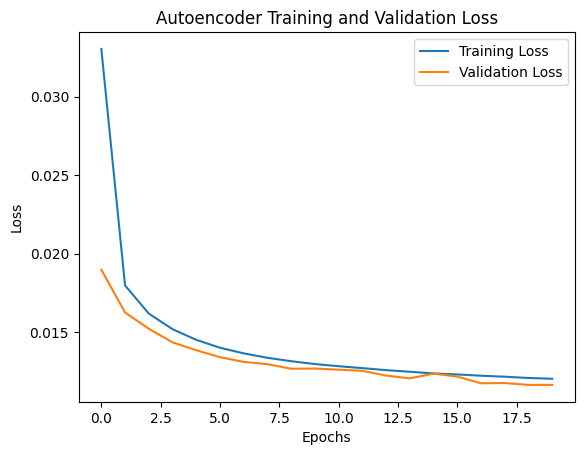

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
y = np.array([[0, 3, 0, 0]])
y_pred = decoder.predict(y)

plt.imshow(y_pred.squeeze(), cmap='gray')

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_10' (type Sequential).
    
    Input 0 of layer "dense_7" is incompatible with the layer: expected axis -1 of input shape to have value 16, but received input with shape (None, 4)
    
    Call arguments received by layer 'sequential_10' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 4), dtype=int64)
      • training=False
      • mask=None
